In [1]:
# import libraries
from sagemaker import get_execution_role                            
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
role = get_execution_role()
awsBucketName = ''
fileName = 'mtcars.csv'
bucketPath = f"s3://{awsBucketName}/{fileName}"

mtcars = pd.read_csv(bucketPath)

In [3]:
mtcars.dtypes.value_counts()

float64    5
int64      4
object     3
dtype: int64

In [4]:
mtcars.select_dtypes('object').apply(pd.Series.nunique, axis = 0) # Get number of unique categorical values for each object column

carName                                   32
engineShapeVSF-(vshaped,straight,flat)     3
transmissionType                           2
dtype: int64

In [5]:
mtcars = mtcars.drop(columns = ["carName"])

In [6]:
mtcars

,milesPerGallon,numberOfCylinders,displacement,horsePower,rearAxleRatio,weight,quarterMileS,"engineShapeVSF-(vshaped,straight,flat)",transmissionType,numberOfGears,numberOfCarburetors
0,21.0,6,160.0,110,3.90,2.620,16.46,v,a,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,v,a,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,s,a,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,s,m,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,v,m,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,f,m,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,v,m,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,s,m,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,s,m,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,s,m,4,4


In [7]:
#Encode transmissionType
le = LabelEncoder()

le.fit(mtcars["transmissionType"])
mtcars["transmissionType"] = le.transform(mtcars["transmissionType"])

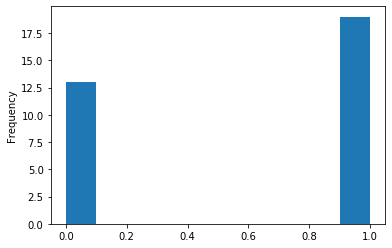

In [8]:
mtcars["transmissionType"].astype(int).plot.hist();

In [9]:
mtcars.shape

(32, 11)

In [10]:
mtcars = pd.get_dummies(mtcars)

In [11]:
mtcars.shape

(32, 13)

In [12]:
mtcars

,milesPerGallon,numberOfCylinders,displacement,horsePower,rearAxleRatio,weight,quarterMileS,transmissionType,numberOfGears,numberOfCarburetors,"engineShapeVSF-(vshaped,straight,flat)_f","engineShapeVSF-(vshaped,straight,flat)_s","engineShapeVSF-(vshaped,straight,flat)_v"
0,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4,0,0,1
1,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4,0,0,1
2,22.8,4,108.0,93,3.85,2.320,18.61,0,4,1,0,1,0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1,0,1,0
4,18.7,8,360.0,175,3.15,3.440,17.02,1,3,2,0,0,1
5,18.1,6,225.0,105,2.76,3.460,20.22,1,3,1,1,0,0
6,14.3,8,360.0,245,3.21,3.570,15.84,1,3,4,0,0,1
7,24.4,4,146.7,62,3.69,3.190,20.00,1,4,2,0,1,0
8,22.8,4,140.8,95,3.92,3.150,22.90,1,4,2,0,1,0
9,19.2,6,167.6,123,3.92,3.440,18.30,1,4,4,0,1,0


In [15]:
mtcars.isnull().sum() #No missing values

milesPerGallon                              0
numberOfCylinders                           0
displacement                                0
horsePower                                  0
rearAxleRatio                               0
weight                                      0
quarterMileS                                0
transmissionType                            0
numberOfGears                               0
numberOfCarburetors                         0
engineShapeVSF-(vshaped,straight,flat)_f    0
engineShapeVSF-(vshaped,straight,flat)_s    0
engineShapeVSF-(vshaped,straight,flat)_v    0
dtype: int64

In [17]:
mtcars.corr()['transmissionType'].sort_values() #check correlation with respect to our target column. Lets predict transmission type.

numberOfGears                              -0.794059
rearAxleRatio                              -0.712711
milesPerGallon                             -0.599832
engineShapeVSF-(vshaped,straight,flat)_f   -0.264542
engineShapeVSF-(vshaped,straight,flat)_s   -0.222672
numberOfCarburetors                        -0.057534
quarterMileS                                0.229861
horsePower                                  0.243204
engineShapeVSF-(vshaped,straight,flat)_v    0.394472
numberOfCylinders                           0.522607
displacement                                0.591227
weight                                      0.692495
transmissionType                            1.000000
Name: transmissionType, dtype: float64

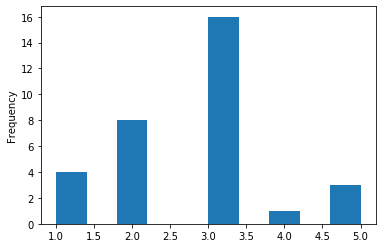

In [18]:
mtcars["weight"].astype(int).plot.hist();

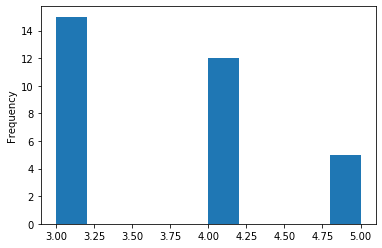

In [19]:
mtcars["numberOfGears"].astype(int).plot.hist();